<a href="https://colab.research.google.com/github/Arminsbss/Epidemic-calculator/blob/main/epidemic_calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Main SEAIR**

In [ ]:
import numpy as np

def seair_simulation(population, r0, incubation_period, recovery_period, initial_infected, days):
    susceptible = population - initial_infected
    exposed = initial_infected
    asymptomatic = 0
    infected = initial_infected
    removed = 0

    # Parameters
    alpha = 1 / incubation_period
    gamma = 1 / recovery_period

    # Arrays to store results
    susceptible_over_time = [susceptible]
    exposed_over_time = [exposed]
    asymptomatic_over_time = [asymptomatic]
    infected_over_time = [infected]
    removed_over_time = [removed]

    # SEAIR model simulation
    for day in range(1, days):
        new_exposed = (r0 * alpha * susceptible * infected) / population
        new_asymptomatic = alpha * exposed
        new_infected = gamma * asymptomatic
        new_removed = gamma * infected

        susceptible -= new_exposed
        exposed += new_exposed - new_asymptomatic
        asymptomatic += new_asymptomatic - new_infected
        infected += new_infected - new_removed
        removed += new_removed

        susceptible_over_time.append(susceptible)
        exposed_over_time.append(exposed)
        asymptomatic_over_time.append(asymptomatic)
        infected_over_time.append(infected)
        removed_over_time.append(removed)

    return (susceptible_over_time, exposed_over_time, asymptomatic_over_time, infected_over_time, removed_over_time)

# Example usage
population = 9039000
r0 = 2.5
incubation_period = 5
recovery_period = 21
initial_infected = 10
days = 200

results = seair_simulation(population, r0, incubation_period, recovery_period, initial_infected, days)
susceptible_over_time, exposed_over_time, asymptomatic_over_time, infected_over_time, removed_over_time=seair_simulation(population, r0, incubation_period, recovery_period, initial_infected, days)
print("Susceptible:", results[0][-1])
print("Exposed:", results[1][-1])
print("Asymptomatic:", results[2][-1])
print("Infected:", results[3][-1])
print("Removed:", results[4][-1])



Susceptible: 26531.009908037257
Exposed: 53782.62390959804
Asymptomatic: 1786174.7984069602
Infected: 2433597.283625448
Removed: 4738924.284149953


In [ ]:
dayss=[]
for i in range(0,200):
  dayss.append(i)

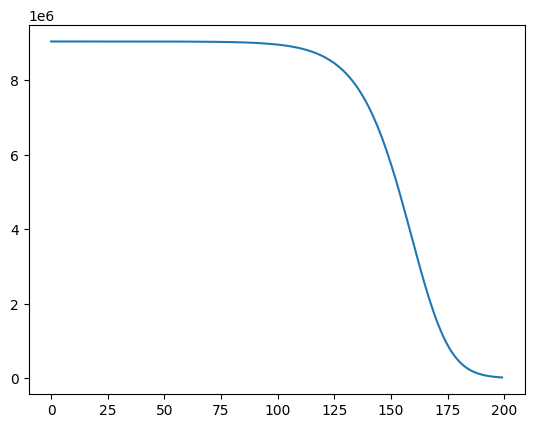

In [ ]:
import matplotlib.pyplot as plt
# x=np.to_array(results)
fig, ax = plt.subplots()
ax.plot(dayss,susceptible_over_time)
plt.show()

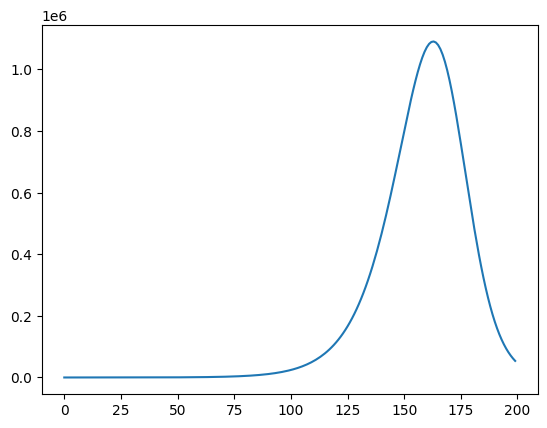

In [ ]:
fig, ax = plt.subplots()
ax.plot(dayss,exposed_over_time)
plt.show()

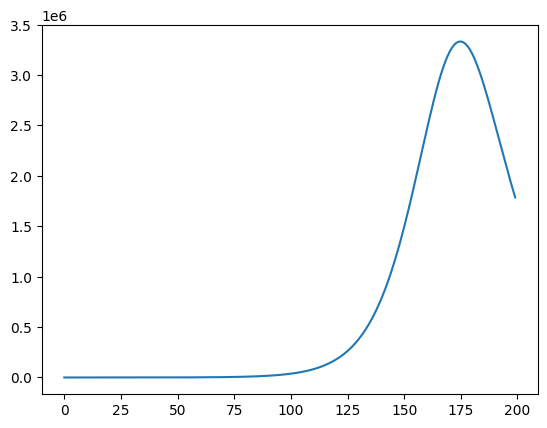

In [ ]:
fig, ax = plt.subplots()
ax.plot(dayss,asymptomatic_over_time)
plt.show()

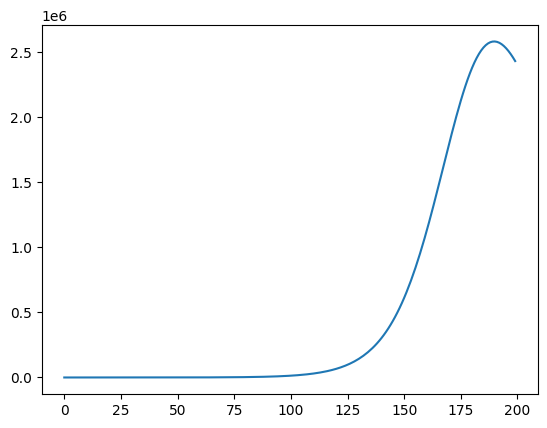

In [ ]:
fig, ax = plt.subplots()
ax.plot(dayss,infected_over_time)
plt.show()

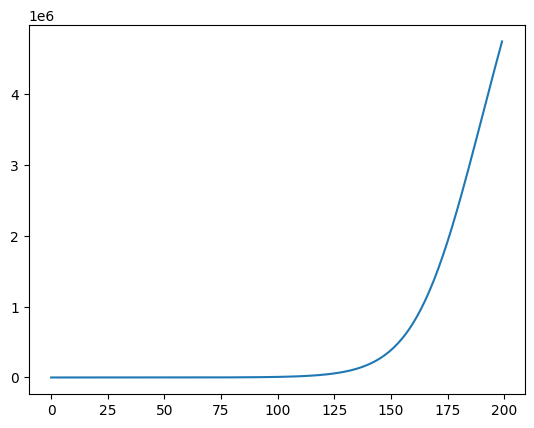

In [ ]:
fig, ax = plt.subplots()
ax.plot(dayss,removed_over_time)
plt.show()

In [ ]:
!pip install PyQt5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.1/338.1 kB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 10.0 MB/s eta 0:00:00


In [ ]:
import sys
from PyQt5.QtWidgets import QApplication, QWidget, QVBoxLayout, QLabel, QLineEdit, QPushButton
import matplotlib.pyplot as plt

class EpidemicCalculator(QWidget):
    def __init__(self):
        super().__init__()
        self.initUI()

    def initUI(self):
        layout = QVBoxLayout()

        self.population_label = QLabel("Population:")
        self.population_input = QLineEdit()
        layout.addWidget(self.population_label)
        layout.addWidget(self.population_input)

        self.r0_label = QLabel("R0:")
        self.r0_input = QLineEdit()
        layout.addWidget(self.r0_label)
        layout.addWidget(self.r0_input)

        self.incubation_label = QLabel("Incubation Period:")
        self.incubation_input = QLineEdit()
        layout.addWidget(self.incubation_label)
        layout.addWidget(self.incubation_input)

        self.recovery_label = QLabel("Recovery Period:")
        self.recovery_input = QLineEdit()
        layout.addWidget(self.recovery_label)
        layout.addWidget(self.recovery_input)

        self.infected_label = QLabel("Initial Infected:")
        self.infected_input = QLineEdit()
        layout.addWidget(self.infected_label)
        layout.addWidget(self.infected_input)

        self.days_label = QLabel("Days:")
        self.days_input = QLineEdit()
        layout.addWidget(self.days_label)
        layout.addWidget(self.days_input)

        self.simulate_button = QPushButton("Run Simulation")
        self.simulate_button.clicked.connect(self.run_simulation)
        layout.addWidget(self.simulate_button)

        self.setLayout(layout)
        self.setWindowTitle("Epidemic Calculator")
        self.show()

    def run_simulation(self):
        population = int(self.population_input.text())
        r0 = float(self.r0_input.text())
        incubation_period = int(self.incubation_input.text())
        recovery_period = int(self.recovery_input.text())
        initial_infected = int(self.infected_input.text())
        days = int(self.days_input.text())

        results = seair_simulation(population, r0, incubation_period, recovery_period, initial_infected, days)

        plt.plot(results[0], label='Susceptible')
        plt.plot(results[1], label='Exposed')
        plt.plot(results[2], label='Asymptomatic')
        plt.plot(results[3], label='Infected')
        plt.plot(results[4], label='Removed')
        plt.legend()
        plt.xlabel('Days')
        plt.ylabel('Population')
        plt.title('SEAIR Model Simulation')
        plt.show()

if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = EpidemicCalculator()
    sys.exit(app.exec_())


# **SEAIR from last paper**

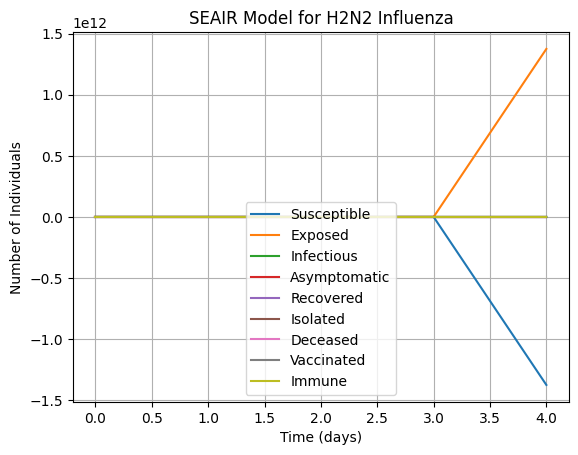

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# SEAIR Model Parameters
betta = 0.85  # Transmission rate
epsilon = 0.50  # Relative infectivity of asymptomatic cases
X = 0.75  # Relative infectivity of isolated symptomatic cases
alpha = 0.52  # Rate of progression from exposed class (median incubation period 1.9 days)
gamma = 0.40  # Rate of progression to recovered class mean infectious period 2.49 days
zetta = 0.03  # Case fatality rate
omega = 0.67  # Proportion of exposed cases that become symptomatic
delta = 0.018  # Rate of progression to death among symptomatic infectious class
tetta = 0.02  # Isolation rate after Day 45, prior to that it is 0
meu = 0.90  # Treatment effectiveness 1-relative reduction in mortality due to treatment
neu = 0.0001  # Global vaccination rate per day after Day 240, prior to that it is 0
etta = 0.02  # Migration rate between cities and regions (location dependent)

# Initial population values
N = 9039000  # Total population
E0 = 1  # Initial number of exposed individuals
I0 = 0  # Initial number of infectious individuals
A0 = 0  # Initial number of asymptomatic individuals
R0 = 0  # Initial number of recovered individuals
S0 = N - E0 - I0 - A0 - R0  # Initial number of susceptible individuals
Is0 = 0  # Initial number of isolated individuals
D0 = 0  # Initial number of deceased individuals
Va0 = 0  # Initial number of vaccinated individuals
Im0 = 0  # Initial number of immune individuals

# Time vector
t_max = 5  # Simulation time (days)
dt = 1  # Time step
t = np.arange(0, t_max, dt)
C=V=a=1

# SEAIR Model Function
def seair_model(S, E, I, A, R, Is, D, Va, Im, t):
    dSdt = -betta * (I + epsilon * A + X * I * S) / N * S - neu * C * V * a
    dEdt = betta * (I + epsilon * A + X * I * S) / N * S - alpha * E
    dIdt = omega * alpha * E - (delta + tetta) * I
    dAdt = (1 - omega) * alpha * E - gamma * A
    dRdt = gamma * I + gamma * A
    dIsdt = tetta * I
    dDdt = delta * I
    dVadt = neu * C * V * a
    dImdt = 0  # Assuming no migration in this simplified model

    return dSdt, dEdt, dIdt, dAdt, dRdt, dIsdt, dDdt, dVadt, dImdt

# Run the SEAIR Model
SEAIR = np.zeros((len(t), 9))
SEAIR[0] = [S0, E0, I0, A0, R0, Is0, D0, Va0, Im0]

for i in range(1, len(t)):
    dSdt, dEdt, dIdt, dAdt, dRdt, dIsdt, dDdt, dVadt, dImdt = seair_model(*SEAIR[i - 1], t[i])
    SEAIR[i] = SEAIR[i - 1] + np.array([dSdt, dEdt, dIdt, dAdt, dRdt, dIsdt, dDdt, dVadt, dImdt]) * dt

# Plotting
plt.plot(t, SEAIR[:, 0], label='Susceptible')
plt.plot(t, SEAIR[:, 1], label='Exposed')
plt.plot(t, SEAIR[:, 2], label='Infectious')
plt.plot(t, SEAIR[:, 3], label='Asymptomatic')
plt.plot(t, SEAIR[:, 4], label='Recovered')
plt.plot(t, SEAIR[:, 5], label='Isolated')
plt.plot(t, SEAIR[:, 6], label='Deceased')
plt.plot(t, SEAIR[:, 7], label='Vaccinated')
plt.plot(t, SEAIR[:, 8], label='Immune')
plt.xlabel('Time (days)')
plt.ylabel('Number of Individuals')
plt.title('SEAIR Model for H2N2 Influenza')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-2-79e7a8177235>:42: RuntimeWarning: overflow encountered in scalar multiply
  dS = -lambd * S
<ipython-input-2-79e7a8177235>:43: RuntimeWarning: overflow encountered in scalar multiply
  dE = lambd * S - alpha * E
<ipython-input-2-79e7a8177235>:43: RuntimeWarning: invalid value encountered in scalar subtract
  dE = lambd * S - alpha * E


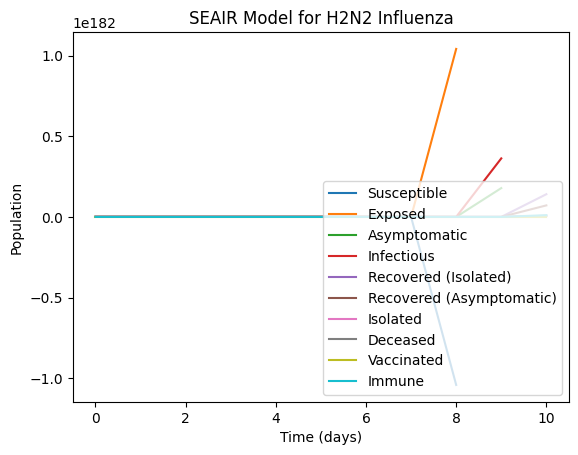

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# SEAIR Model Parameters
betta = 0.85  # Transmission rate
epsilon = 0.50  # Relative infectivity of asymptomatic cases
X = 0.75  # Relative infectivity of isolated symptomatic cases
alpha = 0.52  # Rate of progression from exposed class (median incubation period 1.9 days)
gamma = 0.40  # Rate of progression to recovered class mean infectious period 2.49 days
zetta = 0.03  # Case fatality rate
omega = 0.67  # Proportion of exposed cases that become symptomatic
delta = 0.018  # Rate of progression to death among symptomatic infectious class
tetta = 0.02  # Isolation rate after Day 45, prior to that it is 0
meu = 0.90  # Treatment effectiveness 1-relative reduction in mortality due to treatment
neu = 0.0001  # Global vaccination rate per day after Day 240, prior to that it is 0
N = 100000  # Population size

# Initial values
S0 = N - 1
E0 = 1
A0 = 0
I0 = 0
Ri0 = 0
Ra0 = 0
Is0 = 0
D0 = 0
Va0 = 0
Im0 = 0

# Time parameters
t_max = 10  # Simulation time
dt = 1  # Time step size
num_steps = int(t_max / dt) + 1

# Function to calculate lambda (force of infection)
def calculate_lambda(S, I, A):
    return betta * (I + epsilon * A + X * I * S) / N

# Function to update compartments based on SEAIR model equations
def update_compartments(S, E, A, I, Ri, Ra, Is, D, Va, Im):
    lambd = calculate_lambda(S, I, A)
    dS = -lambd * S
    dE = lambd * S - alpha * E
    dA = (1 - omega) * alpha * E - gamma * A
    dI = omega * alpha * E - (delta + tetta) * I
    dRi = gamma * (1 - zetta) * I
    dRa = gamma * A
    dIs = tetta * I
    dD = delta * I
    dVa = neu * N
    dIm = zetta * I
    return dS, dE, dA, dI, dRi, dRa, dIs, dD, dVa, dIm

# Initialize arrays to store results
S = np.zeros(num_steps)
E = np.zeros(num_steps)
A = np.zeros(num_steps)
I = np.zeros(num_steps)
Ri = np.zeros(num_steps)
Ra = np.zeros(num_steps)
Is = np.zeros(num_steps)
D = np.zeros(num_steps)
Va = np.zeros(num_steps)
Im = np.zeros(num_steps)

# Set initial values
S[0] = S0
E[0] = E0
A[0] = A0
I[0] = I0
Ri[0] = Ri0
Ra[0] = Ra0
Is[0] = Is0
D[0] = D0
Va[0] = Va0
Im[0] = Im0

# Euler's method to solve the ODEs
for t in range(1, num_steps):
    dS, dE, dA, dI, dRi, dRa, dIs, dD, dVa, dIm = update_compartments(S[t-1], E[t-1], A[t-1], I[t-1], Ri[t-1], Ra[t-1], Is[t-1], D[t-1], Va[t-1], Im[t-1])
    S[t] = S[t-1] + dt * dS
    E[t] = E[t-1] + dt * dE
    A[t] = A[t-1] + dt * dA
    I[t] = I[t-1] + dt * dI
    Ri[t] = Ri[t-1] + dt * dRi
    Ra[t] = Ra[t-1] + dt * dRa
    Is[t] = Is[t-1] + dt * dIs
    D[t] = D[t-1] + dt * dD
    Va[t] = Va[t-1] + dt * dVa
    Im[t] = Im[t-1] + dt * dIm

# Plotting the results
plt.plot(S, label='Susceptible')
plt.plot(E, label='Exposed')
plt.plot(A, label='Asymptomatic')
plt.plot(I, label='Infectious')
plt.plot(Ri, label='Recovered (Isolated)')
plt.plot(Ra, label='Recovered (Asymptomatic)')
plt.plot(Is, label='Isolated')
plt.plot(D, label='Deceased')
plt.plot(Va, label='Vaccinated')
plt.plot(Im, label='Immune')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title('SEAIR Model for H2N2 Influenza')
plt.legend()
plt.show()


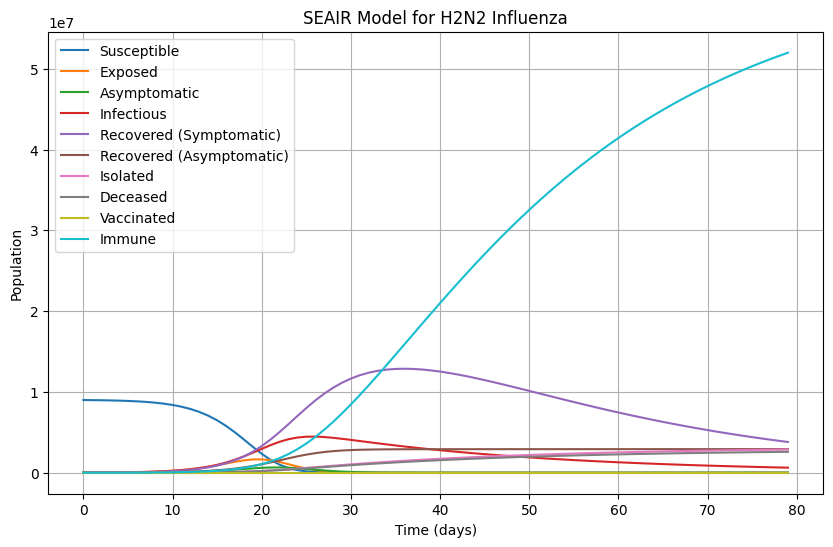

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# SEAIR Model Parameters
betta = 0.85  # Transmission rate
epsilon = 0.50  # Relative infectivity of asymptomatic cases
X = 0.75  # Relative infectivity of isolated symptomatic cases
alpha = 0.52  # Rate of progression from exposed class (median incubation period 1.9 days)
gamma = 0.40  # Rate of progression to recovered class mean infectious period 2.49 days
zetta = 0.03  # Case fatality rate
omega = 0.67  # Proportion of exposed cases that become symptomatic
delta = 0.018  # Rate of progression to death among symptomatic infectious class
tetta = 0.02  # Isolation rate after Day 45, prior to that it is 0
meu = 0.90  # Treatment effectiveness 1-relative reduction in mortality due to treatment
neu = 0.0001  # Global vaccination rate per day after Day 240, prior to that it is 0
etta = 0.1  # Migration rate between cities and regions location dependent

# Initial conditions
S0 = 9000000  # Initial susceptible population
E0 = 10000  # Initial exposed population
A0 = 20000  # Initial asymptomatic population
I0 = 9000  # Initial infectious population
Ri0 = 0  # Initial recovered from symptomatic population
Ra0 = 0  # Initial recovered from asymptomatic population
Is0 = 0  # Initial isolated population
D0 = 0  # Initial deceased population
Va0 = 0  # Initial vaccinated population
Im0 = 0  # Initial immune population

# Total population
N = S0 + E0 + A0 + I0 + Ri0 + Ra0 + Is0 + D0 + Va0 + Im0

# Time vector
t_max = 80  # Simulation time (days)
dt = 1  # Time step
t = np.arange(0, t_max, dt)

# SEAIR Model function
def seair_model(S, E, A, I, Ri, Ra, Is, D, Va, Im, t):
    lambda_ = betta * (I + epsilon * A + X * Is) / N
    dSdt = -lambda_ * S + neu * N - neu * S * Va
    dEdt = lambda_ * S - alpha * omega * E - alpha * (1 - omega) * E
    dAdt = alpha * (1 - omega) * E - gamma * A
    dIdt = alpha * omega * E - (delta + tetta) * I
    dRidt = gamma * (1 - zetta) * I - etta * Ri
    dRadt = gamma * (1 - zetta) * A
    dIsdt = tetta * I
    dDdt = delta * I
    dVadt = neu * S * Va
    dImdt = etta * Ri
    return dSdt, dEdt, dAdt, dIdt, dRidt, dRadt, dIsdt, dDdt, dVadt, dImdt

# Euler's method solver
def euler_method(S0, E0, A0, I0, Ri0, Ra0, Is0, D0, Va0, Im0, t):
    S, E, A, I, Ri, Ra, Is, D, Va, Im = [S0], [E0], [A0], [I0], [Ri0], [Ra0], [Is0], [D0], [Va0], [Im0]
    for i in range(1, len(t)):
        dSdt, dEdt, dAdt, dIdt, dRidt, dRadt, dIsdt, dDdt, dVadt, dImdt = seair_model(S[-1], E[-1], A[-1], I[-1], Ri[-1], Ra[-1], Is[-1], D[-1], Va[-1], Im[-1], t[i])
        S.append(S[-1] + dSdt * dt)
        E.append(E[-1] + dEdt * dt)
        A.append(A[-1] + dAdt * dt)
        I.append(I[-1] + dIdt * dt)
        Ri.append(Ri[-1] + dRidt * dt)
        Ra.append(Ra[-1] + dRadt * dt)
        Is.append(Is[-1] + dIsdt * dt)
        D.append(D[-1] + dDdt * dt)
        Va.append(Va[-1] + dVadt * dt)
        Im.append(Im[-1] + dImdt * dt)
    return np.array(S), np.array(E), np.array(A), np.array(I), np.array(Ri), np.array(Ra), np.array(Is), np.array(D), np.array(Va), np.array(Im)

# Run the model
S, E, A, I, Ri, Ra, Is, D, Va, Im = euler_method(S0, E0, A0, I0, Ri0, Ra0, Is0, D0, Va0, Im0, t)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible')
plt.plot(t, E, label='Exposed')
plt.plot(t, A, label='Asymptomatic')
plt.plot(t, I, label='Infectious')
plt.plot(t, Ri, label='Recovered (Symptomatic)')
plt.plot(t, Ra, label='Recovered (Asymptomatic)')
plt.plot(t, Is, label='Isolated')
plt.plot(t, D, label='Deceased')
plt.plot(t, Va, label='Vaccinated')
plt.plot(t, Im, label='Immune')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title('SEAIR Model for H2N2 Influenza')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
j=1
print('day','|Susceptible','|Exposed','|Asymptomatic','|Infectious','|Recovered (Symptomatic)','|Recovered (Asymptomatic)','|Isolated','|Deceased','|Vaccinated','|Immune/')
for i in range(0,t_max):
  print(j,'|',int(S[i]),'|',int(E[i]),'|',int(A[i]),'|',int(I[i]),'|',int(Ri[i]),'|',int(Ra[i]),'|',int(Is[i]),'|',int(D[i]),'|',int(Va[i]),'|',int(Im[i]),'/')
  j+=1
# S, E, A, I, Ri, Ra, Is, D, Va, Im



day |Susceptible |Exposed |Asymptomatic |Infectious |Recovered (Symptomatic) |Recovered (Asymptomatic) |Isolated |Deceased |Vaccinated |Immune/
1 | 9000000 | 10000 | 20000 | 9000 | 0 | 0 | 0 | 0 | 0 | 0 /
2 | 8984823 | 20880 | 13716 | 12142 | 3492 | 7760 | 180 | 162 | 0 | 0 /
3 | 8969560 | 26189 | 11812 | 18955 | 7853 | 13081 | 422 | 380 | 0 | 349 /
4 | 8949226 | 33808 | 11581 | 27359 | 14423 | 17665 | 801 | 721 | 0 | 1134 /
5 | 8921726 | 44632 | 12750 | 38098 | 23596 | 22158 | 1349 | 1214 | 0 | 2576 /
6 | 8884468 | 59584 | 15309 | 52200 | 36019 | 27106 | 2111 | 1900 | 0 | 4936 /
7 | 8834042 | 79931 | 19410 | 70976 | 52671 | 33046 | 3155 | 2839 | 0 | 8538 /
8 | 8765955 | 107357 | 25362 | 96127 | 74942 | 40577 | 4574 | 4117 | 0 | 13805 /
9 | 8674337 | 144053 | 33639 | 129878 | 104746 | 50417 | 6497 | 5847 | 0 | 21299 /
10 | 8551604 | 192783 | 44903 | 175130 | 144664 | 63470 | 9094 | 8185 | 0 | 31774 /
11 | 8388133 | 256910 | 60023 | 235641 | 198148 | 80892 | 12597 | 11337 | 0 | 46240 /


## **Awsome plot!**

In [ ]:
import tkinter as tk
from tkinter import ttk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# SEAIR Model Parameters (default values)
parameters = {
    "betta": 0.85,
    "epsilon": 0.50,
    "X": 0.75,
    "alpha": 0.52,
    "gamma": 0.40,
    "zetta": 0.03,
    "omega": 0.67,
    "delta": 0.018,
    "tetta": 0.02,
    "meu": 0.90,
    "neu": 0.0001,
    "etta": 0.1
}

# Initial conditions (default values)
initial_conditions = {
    "S0": 9000000,
    "E0": 10000,
    "A0": 20000,
    "I0": 9000,
    "Ri0": 0,
    "Ra0": 0,
    "Is0": 0,
    "D0": 0,
    "Va0": 0,
    "Im0": 0
}

# Function to update parameters based on user input
def update_parameters():
    for param in parameters:
        parameters[param] = float(param_entries[param].get())

# Function to update initial conditions based on user input
def update_initial_conditions():
    for ic in initial_conditions:
        initial_conditions[ic] = float(ic_entries[ic].get())

# SEAIR Model function
def seair_model(S, E, A, I, Ri, Ra, Is, D, Va, Im, t):
    lambda_ = parameters["betta"] * (I + parameters["epsilon"] * A + parameters["X"] * Is) / N
    dSdt = -lambda_ * S + parameters["neu"] * N - parameters["neu"] * S * Va
    dEdt = lambda_ * S - parameters["alpha"] * parameters["omega"] * E - parameters["alpha"] * (1 - parameters["omega"]) * E
    dAdt = parameters["alpha"] * (1 - parameters["omega"]) * E - parameters["gamma"] * A
    dIdt = parameters["alpha"] * parameters["omega"] * E - (parameters["delta"] + parameters["tetta"]) * I
    dRidt = parameters["gamma"] * (1 - parameters["zetta"]) * I - parameters["etta"] * Ri
    dRadt = parameters["gamma"] * (1 - parameters["zetta"]) * A
    dIsdt = parameters["tetta"] * I
    dDdt = parameters["delta"] * I
    dVadt = parameters["neu"] * S * Va
    dImdt = parameters["etta"] * Ri
    return dSdt, dEdt, dAdt, dIdt, dRidt, dRadt, dIsdt, dDdt, dVadt, dImdt

# Euler's method solver
def euler_method(S0, E0, A0, I0, Ri0, Ra0, Is0, D0, Va0, Im0, t):
    S, E, A, I, Ri, Ra, Is, D, Va, Im = [S0], [E0], [A0], [I0], [Ri0], [Ra0], [Is0], [D0], [Va0], [Im0]
    for i in range(1, len(t)):
        dSdt, dEdt, dAdt, dIdt, dRidt, dRadt, dIsdt, dDdt, dVadt, dImdt = seair_model(S[-1], E[-1], A[-1], I[-1], Ri[-1], Ra[-1], Is[-1], D[-1], Va[-1], Im[-1], t[i])
        S.append(S[-1] + dSdt * dt)
        E.append(E[-1] + dEdt * dt)
        A.append(A[-1] + dAdt * dt)
        I.append(I[-1] + dIdt * dt)
        Ri.append(Ri[-1] + dRidt * dt)
        Ra.append(Ra[-1] + dRadt * dt)
        Is.append(Is[-1] + dIsdt * dt)
        D.append(D[-1] + dDdt * dt)
        Va.append(Va[-1] + dVadt * dt)
        Im.append(Im[-1] + dImdt * dt)
    return np.array(S), np.array(E), np.array(A), np.array(I), np.array(Ri), np.array(Ra), np.array(Is), np.array(D), np.array(Va), np.array(Im)

# Run the model
N = sum(initial_conditions.values())  # Total population
t_max = 80  # Simulation time (days)
dt = 1  # Time step
t = np.arange(0, t_max, dt)

S, E, A, I, Ri, Ra, Is, D, Va, Im = euler_method(initial_conditions["S0"], initial_conditions["E0"], initial_conditions["A0"], initial_conditions["I0"], initial_conditions["Ri0"], initial_conditions["Ra0"], initial_conditions["Is0"], initial_conditions["D0"], initial_conditions["Va0"], initial_conditions["Im0"], t)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible')
plt.plot(t, E, label='Exposed')
plt.plot(t, A, label='Asymptomatic')
plt.plot(t, I, label='Infectious')
plt.plot(t, Ri, label='Recovered (Symptomatic)')
plt.plot(t, Ra, label='Recovered (Asymptomatic)')
plt.plot(t, Is, label='Isolated')
plt.plot(t, D, label='Deceased')
plt.plot(t, Va, label='Vaccinated')
plt.plot(t, Im, label='Immune')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title('SEAIR Model for H2N2 Influenza')
plt.legend()
plt.grid(True)
plt.show()


## **Detailed plot**

In [ ]:
import tkinter as tk
from tkinter import ttk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import seaborn as sns

# SEAIR Model Parameters (default values)
parameters = {
    "betta": 0.85,
    "epsilon": 0.50,
    "X": 0.75,
    "alpha": 0.52,
    "gamma": 0.40,
    "zetta": 0.03,
    "omega": 0.67,
    "delta": 0.018,
    "tetta": 0.02,
    "meu": 0.90,
    "neu": 0.0001,
    "etta": 0.1
}

# Initial conditions (default values)
initial_conditions = {
    "S0": 9000000,
    "E0": 10000,
    "A0": 20000,
    "I0": 9000,
    "Ri0": 0,
    "Ra0": 0,
    "Is0": 0,
    "D0": 0,
    "Va0": 0,
    "Im0": 0
}

# Function to update parameters based on user input
def update_parameters():
    for param in parameters:
        parameters[param] = float(param_entries[param].get())

# Function to update initial conditions based on user input
def update_initial_conditions():
    for ic in initial_conditions:
        initial_conditions[ic] = float(ic_entries[ic].get())

# Function to make parameter entry fields editable
def make_parameters_editable():
    for entry in param_entries.values():
        entry.configure(state='normal')

# SEAIR Model function
def seair_model(S, E, A, I, Ri, Ra, Is, D, Va, Im, t):
    lambda_ = parameters["betta"] * (I + parameters["epsilon"] * A + parameters["X"] * Is) / N
    dSdt = -lambda_ * S + parameters["neu"] * N - parameters["neu"] * S * Va
    dEdt = lambda_ * S - parameters["alpha"] * parameters["omega"] * E - parameters["alpha"] * (1 - parameters["omega"]) * E
    dAdt = parameters["alpha"] * (1 - parameters["omega"]) * E - parameters["gamma"] * A
    dIdt = parameters["alpha"] * parameters["omega"] * E - (parameters["delta"] + parameters["tetta"]) * I
    dRidt = parameters["gamma"] * (1 - parameters["zetta"]) * I - parameters["etta"] * Ri
    dRadt = parameters["gamma"] * (1 - parameters["zetta"]) * A
    dIsdt = parameters["tetta"] * I
    dDdt = parameters["delta"] * I
    dVadt = parameters["neu"] * S * Va
    dImdt = parameters["etta"] * Ri
    return dSdt, dEdt, dAdt, dIdt, dRidt, dRadt, dIsdt, dDdt, dVadt, dImdt

# Euler's method solver
def euler_method(S0, E0, A0, I0, Ri0, Ra0, Is0, D0, Va0, Im0, t):
    S, E, A, I, Ri, Ra, Is, D, Va, Im = [S0], [E0], [A0], [I0], [Ri0], [Ra0], [Is0], [D0], [Va0], [Im0]
    for i in range(1, len(t)):
        dSdt, dEdt, dAdt, dIdt, dRidt, dRadt, dIsdt, dDdt, dVadt, dImdt = seair_model(S[-1], E[-1], A[-1], I[-1], Ri[-1], Ra[-1], Is[-1], D[-1], Va[-1], Im[-1], t[i])
        S.append(S[-1] + dSdt * dt)
        E.append(E[-1] + dEdt * dt)
        A.append(A[-1] + dAdt * dt)
        I.append(I[-1] + dIdt * dt)
        Ri.append(Ri[-1] + dRidt * dt)
        Ra.append(Ra[-1] + dRadt * dt)
        Is.append(Is[-1] + dIsdt * dt)
        D.append(D[-1] + dDdt * dt)
        Va.append(Va[-1] + dVadt * dt)
        Im.append(Im[-1] + dImdt * dt)
    return np.array(S), np.array(E), np.array(A), np.array(I), np.array(Ri), np.array(Ra), np.array(Is), np.array(D), np.array(Va), np.array(Im)

# Function to update plot with simulation results
def update_plot():
    update_parameters()
    update_initial_conditions()
    S, E, A, I, Ri, Ra, Is, D, Va, Im = euler_method(initial_conditions["S0"], initial_conditions["E0"], initial_conditions["A0"], initial_conditions["I0"], initial_conditions["Ri0"], initial_conditions["Ra0"], initial_conditions["Is0"], initial_conditions["D0"], initial_conditions["Va0"], initial_conditions["Im0"], t)
    ax.clear()
    ax.plot(t, S, label='Susceptible', linestyle='-')
    ax.plot(t, E, label='Exposed', linestyle='--')
    ax.plot(t, A, label='Asymptomatic', linestyle='-')
    ax.plot(t, I, label='Infectious', linestyle='--')
    ax.plot(t, Ri, label='Recovered (Symptomatic)', linestyle='-')
    ax.plot(t, Ra, label='Recovered (Asymptomatic)', linestyle='--')
    ax.plot(t, Is, label='Isolated', linestyle='-')
    ax.plot(t, D, label='Deceased', linestyle='--')
    ax.plot(t, Va, label='Vaccinated', linestyle='-')
    ax.plot(t, Im, label='Immune', linestyle='--')
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Population')
    ax.set_title('SEAIR Model for H2N2 Influenza')
    ax.legend()
    canvas.draw()

# Run the model initially
N = sum(initial_conditions.values())  # Total population
t_max = 80  # Simulation time (days)
dt = 1  # Time step
t = np.arange(0, t_max, dt)

# Create Tkinter window
root = tk.Tk()
root.title("SEAIR Model Simulation")

# Create notebook widget to organize parameters and initial conditions
notebook = ttk.Notebook(root)
notebook.pack(fill=tk.BOTH, expand=True)

# Create tabs for parameters and initial conditions
parameter_frame = ttk.Frame(notebook)
initial_condition_frame = ttk.Frame(notebook)
notebook.add(parameter_frame, text='Parameters')
notebook.add(initial_condition_frame, text='Initial Conditions')

# Add parameter and initial condition labels and entry fields
param_entries = {}
ic_entries = {}
for i, (param, value) in enumerate(parameters.items()):
    ttk.Label(parameter_frame, text=param).grid(row=i, column=0, padx=5, pady=5)
    param_entries[param] = ttk.Entry(parameter_frame)
    param_entries[param].insert(0, str(value))
    param_entries[param].grid(row=i, column=1, padx=5, pady=5)
    # Add button to make parameter editable
    ttk.Button(parameter_frame, text="Edit", command=make_parameters_editable).grid(row=i, column=2, padx=5, pady=5)

for i, (ic, value) in enumerate(initial_conditions.items()):
    ttk.Label(initial_condition_frame, text=ic).grid(row=i, column=0, padx=5, pady=5)
    ic_entries[ic] = ttk.Entry(initial_condition_frame)
    ic_entries[ic].insert(0, str(value))
    ic_entries[ic].grid(row=i, column=1, padx=5, pady=5)

# Add buttons to update parameters and initial conditions
update_param_button = ttk.Button(root, text="Update Parameters", command=update_parameters)
update_param_button.pack(padx=5, pady=5)

update_ic_button = ttk.Button(root, text="Update Initial Conditions", command=update_initial_conditions)
update_ic_button.pack(padx=5, pady=5)

# Add button to run simulation
run_button = ttk.Button(root, text="Run Simulation", command=update_plot)
run_button.pack(padx=5, pady=5)

# Add matplotlib figure to display the plot
fig, ax = plt.subplots(figsize=(8, 6))
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.draw()
canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

# Start Tkinter main loop
root.mainloop()
